In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.ndimage import rotate

In [3]:
data_orig = misc.face()
x0,y0 = 580,300 # left eye; (xrot,yrot) should point there

In [29]:
def rot(image, xy, angle):
    print("xy", xy)
    print("image shape", image.shape)
    im_rot = rotate(image,angle) 
    org_center = (np.array(image.shape[:2][::-1])-1)/2.
    print("org_center", org_center)
    rot_center = (np.array(im_rot.shape[:2][::-1])-1)/2.
    print("rot_center", rot_center)
    org = xy-org_center
    print("org", org)
    a = np.deg2rad(angle)
    # y' = y*cos(a) - x*sin(a)
    # x' = y*sin(a) + x*cos(a)
    new = np.array([org[0]*np.cos(a) + org[1]*np.sin(a),
            -org[0]*np.sin(a) + org[1]*np.cos(a) ])
    return im_rot, new+rot_center


xy [580 300]
image shape (768, 1024, 3)
org_center [511.5 383.5]
rot_center [558.5 623.5]
org [ 68.5 -83.5]
xy [580 300]
image shape (768, 1024, 3)
org_center [511.5 383.5]
rot_center [637.  596.5]
org [ 68.5 -83.5]
xy [580 300]
image shape (768, 1024, 3)
org_center [511.5 383.5]
rot_center [383.5 511.5]
org [ 68.5 -83.5]


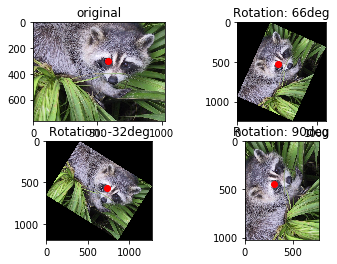

In [30]:
fig,axes = plt.subplots(2,2)

axes[0,0].imshow(data_orig)
axes[0,0].scatter(x0,y0,c="r" )
axes[0,0].set_title("original")


for i, angle in enumerate([66,-32,90]):
    data_rot, (x1,y1) = rot(data_orig, np.array([x0,y0]), angle)
    axes.flatten()[i+1].imshow(data_rot)
    axes.flatten()[i+1].scatter(x1,y1,c="r" )
    axes.flatten()[i+1].set_title("Rotation: {}deg".format(angle))

plt.show()